**Linear Regression implementation using tensorflow**

---

Importing important libraries

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


Generating our sample dataset, this will reduce the overhead of importing a dataset.

In [0]:
def generate_dataset():
  '''
  y will be generated as 2*x + c 
  x will be generated using np.linspace which gives equally separated no's.
  random.seed(1) is used to enable the random function to give same result all the time
  '''
  np.random.seed(1)     
  x_batch=np.linspace(-1,1,101)
  y_batch=2*x_batch+np.random.randn(x_batch.shape[0])*0.3
  return x_batch,y_batch


Plotting our graph from the sample dataset.

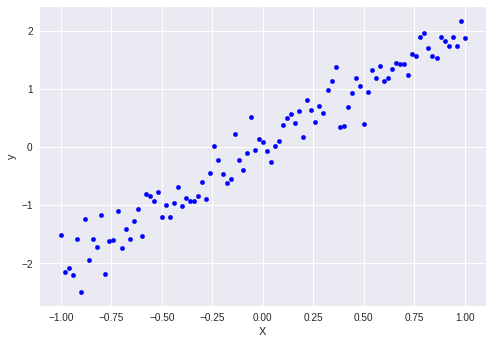

In [26]:
x_batch,y_batch=generate_dataset()
plt.scatter(x_batch,y_batch,20,c='b')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Making a function that will return the loss,placeholders and y_pred

In [0]:
def linear_regression():
  '''
  shape in placeholderd is put as None so that we can dynamically change it with batch size we require
  
  '''
  x=tf.placeholder(tf.float32,shape=(None,),name='x')
  y=tf.placeholder(tf.float32,shape=(None,),name='y')
  
  with tf.variable_scope('lreg') as scope:
    w=tf.Variable(np.random.normal(),name='W')   #in this case a single integer
    y_pred=tf.multiply(w,x)
    loss=tf.reduce_mean(tf.square(y_pred-y))
  return x,y,y_pred,loss  

  

**Run Function inside which optimaization will take place**

In [0]:
def run():
  x_batch,y_batch=generate_dataset()
  x,y,y_pred,loss=linear_regression()
  optimizer=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
  init=tf.global_variables_initializer()
  with tf.Session() as session:
    session.run(init)
    
    feed_dict={x:x_batch,y:y_batch}
    for i in range(30):
      loss_val,_=session.run([loss,optimizer],feed_dict)
      print('iteration: {} loss:{}'.format(i+1,loss_val.mean()))
    y_pred_batch=session.run(y_pred,{x:x_batch})
    plt.scatter(x_batch,y_batch,20,c='r')
    plt.plot(x_batch,y_pred_batch,label='best-fit line')
    plt.savefig('plot.png')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()
  

iteration: 1 loss:0.2981119751930237
iteration: 2 loss:0.26809850335121155
iteration: 3 loss:0.2420281171798706
iteration: 4 loss:0.21938273310661316
iteration: 5 loss:0.19971241056919098
iteration: 6 loss:0.18262632191181183
iteration: 7 loss:0.1677849441766739
iteration: 8 loss:0.15489330887794495
iteration: 9 loss:0.14369536936283112
iteration: 10 loss:0.1339685469865799
iteration: 11 loss:0.12551960349082947
iteration: 12 loss:0.11818066239356995
iteration: 13 loss:0.11180587112903595
iteration: 14 loss:0.10626856982707977
iteration: 15 loss:0.10145873576402664
iteration: 16 loss:0.09728081524372101
iteration: 17 loss:0.09365174174308777
iteration: 18 loss:0.09049946069717407
iteration: 19 loss:0.08776132017374039
iteration: 20 loss:0.08538289368152618
iteration: 21 loss:0.08331693708896637
iteration: 22 loss:0.0815223902463913
iteration: 23 loss:0.07996361702680588
iteration: 24 loss:0.07860963046550751
iteration: 25 loss:0.0774335190653801
iteration: 26 loss:0.07641192525625229
i

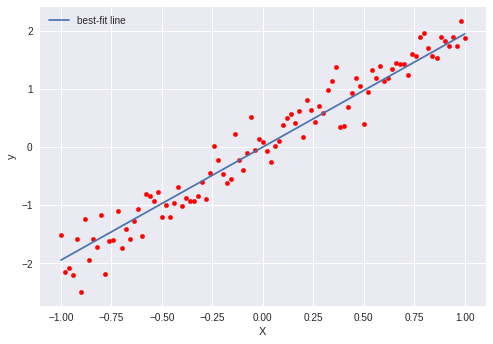

In [63]:
run()
